<a href="https://colab.research.google.com/github/OlamidotunT/Topic-modeling-and-sentiment-analysis-of-BA-reviews/blob/main/British_Airways_Customer_Review_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Web scraping and analysis**

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import os
import time
import random

# Ensure the 'data' folder exists
data_folder = 'data'
if not os.path.exists(data_folder):
    os.makedirs(data_folder)

base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

for i in range(1, pages + 1):
    print(f"Scraping page {i}")
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"
    response = requests.get(url)
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    print(f"   ---> {len(reviews)} total reviews")

# Create a Pandas DataFrame from the list of reviews
df = pd.DataFrame({'review_text': reviews})

# Save the DataFrame to a CSV file
output_file = os.path.join(data_folder, 'british_airways_reviews.csv')
try:
    df.to_csv(output_file, index=False, encoding='utf-8')  # index=False prevents writing the DataFrame index to the CSV
    print(f"\nSuccessfully saved {len(reviews)} reviews to: {output_file}")
except Exception as e:
    print(f"Error saving the data to CSV: {e}")

print("Web scraping and data saving complete.")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews

Successfully saved 1000 reviews to: data/british_airways_reviews.csv
Web scraping and data saving complete.


Load the data

In [2]:
df = pd.read_csv('data/british_airways_reviews.csv')
print(df.shape)
print(df.head(10))


(1000, 1)
                                         review_text
0  ✅ Trip Verified |   We are extremely grateful ...
1  ✅ Trip Verified |   I had an appalling experie...
2  Not Verified |  Good points, the cabin crew, t...
3  Not Verified |  It was a decent flight, reason...
4  ✅ Trip Verified |   I really like flying Briti...
5  ✅ Trip Verified |   Could not book online the ...
6  ✅ Trip Verified | Having had some rough experi...
7  ✅ Trip Verified |   This comfortable flight wa...
8  ✅ Trip Verified |   Punta Cana Terminal B chec...
9  ✅ Trip Verified |   The employee at Venice Air...


# **Text Preprocessing (Data Cleaning)**

In [3]:
import re

def remove_prefix(text):
    # Remove common review prefixes
    text = re.sub(r"^(✅\s*)?(trip verified\s*\|)?", "", text.strip(), flags=re.IGNORECASE)
    text = re.sub(r"^not verified\s*\|", "", text.strip(), flags=re.IGNORECASE)
    return text.strip()

df['review_text'] = df['review_text'].apply(remove_prefix)


In [4]:
print(df.shape)
print(df.head(10))


(1000, 1)
                                         review_text
0  We are extremely grateful to the crew of fligh...
1  I had an appalling experience with British Air...
2  Good points, the cabin crew, they were helpful...
3  It was a decent flight, reasonable comfortable...
4  I really like flying British Airways particula...
5  Could not book online the night before because...
6  Having had some rough experiences with BA in r...
7  This comfortable flight was BA at its best. Ex...
8  Punta Cana Terminal B check in was straightfor...
9  The employee at Venice Airport checkin was ver...


In [5]:
import pandas as pd
import re
import os

# Load the original raw data
raw_df = pd.read_csv("data/british_airways_reviews.csv")

# Function to remove verification prefixes
def clean_review(text):
    return re.sub(r"^(✅\s*Trip Verified\s*\|\s*|Not Verified\s*\|\s*)", "", text).strip()

# Apply the cleaning function
raw_df["cleaned_text"] = raw_df["review_text"].apply(clean_review)

# Basic text preprocessing: lowercase, remove punctuation and digits
def preprocess(text):
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # Remove punctuation and digits
    return text.lower().strip()

raw_df["processed_text"] = raw_df["cleaned_text"].apply(preprocess)

# Save cleaned version
cleaned_path = "data/cleaned_ba_reviews.csv"
raw_df.to_csv(cleaned_path, index=False, encoding="utf-8")
cleaned_path


'data/cleaned_ba_reviews.csv'

In [7]:
df.head()

,review_text,cleaned_text,processed_text
0,✅ Trip Verified | We are extremely grateful ...,We are extremely grateful to the crew of fligh...,we are extremely grateful to the crew of fligh...
1,✅ Trip Verified | I had an appalling experie...,I had an appalling experience with British Air...,i had an appalling experience with british air...
2,"Not Verified | Good points, the cabin crew, t...","Good points, the cabin crew, they were helpful...",good points the cabin crew they were helpful p...
3,"Not Verified | It was a decent flight, reason...","It was a decent flight, reasonable comfortable...",it was a decent flight reasonable comfortable ...
4,✅ Trip Verified | I really like flying Briti...,I really like flying British Airways particula...,i really like flying british airways particula...


# **Word Clouds (Per Sentiment)**

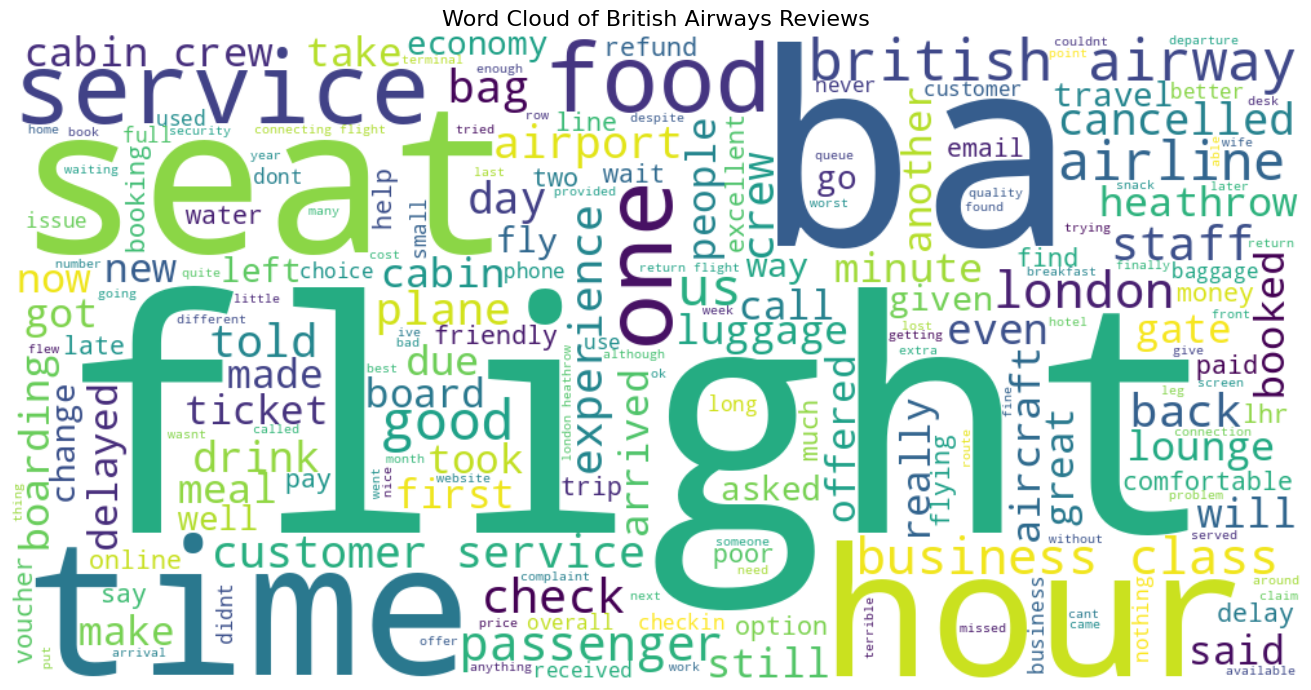

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import seaborn as sns
import nltk

# Load the cleaned review data
df = pd.read_csv("data/cleaned_ba_reviews.csv")

# Create a single string of all processed text
all_words = ' '.join(df['processed_text'].dropna())

# Generate a WordCloud
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(all_words)

# Plot the WordCloud
plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of British Airways Reviews", fontsize=16)
plt.tight_layout()
plt.show()

# Tokenize all words
tokens = all_words.split()

# Count word frequencies
word_freq = Counter(tokens)

# Get top 20 words
common_words = word_freq.most_common(20)
words, counts = zip(*common_words)



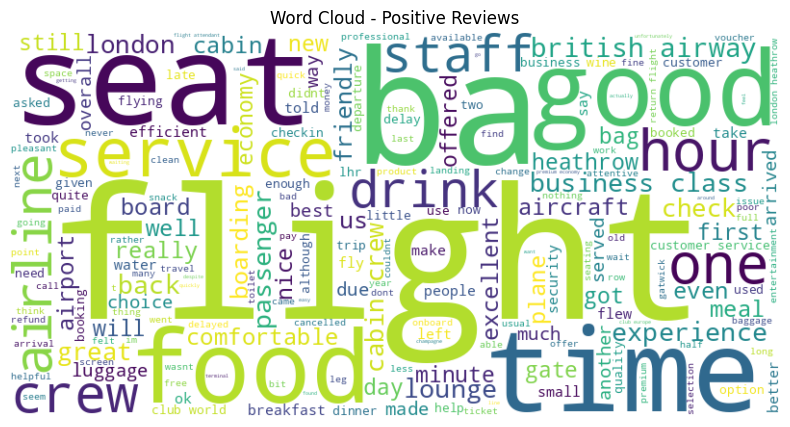

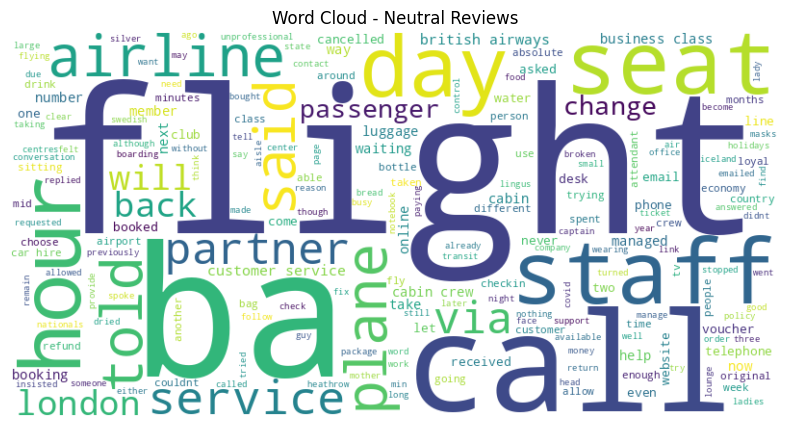

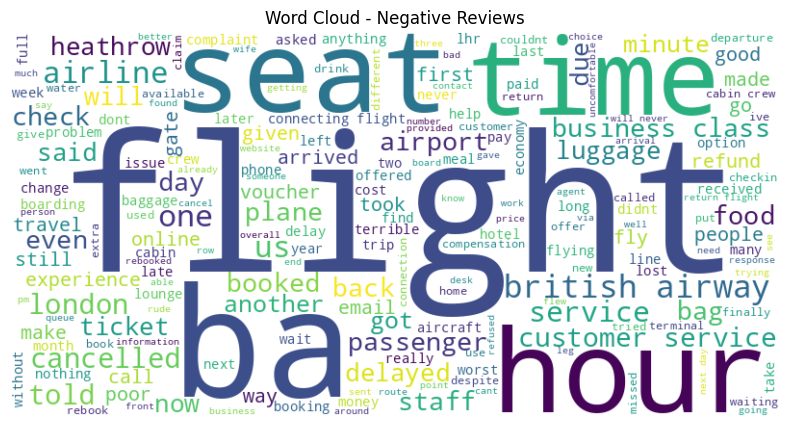

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()


# Word cloud by sentiment
for sentiment in ['Positive', 'Neutral', 'Negative']:
    subset = df[df['sentiment'] == sentiment]
    plot_wordcloud(subset['processed_text'], f'Word Cloud - {sentiment} Reviews')


# **Sentiment Analysis (with VADER)**

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
<ipython-input-8-6651b2a5b570>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='Set2', order=['Positive', 'Neutral', 'Negative'])


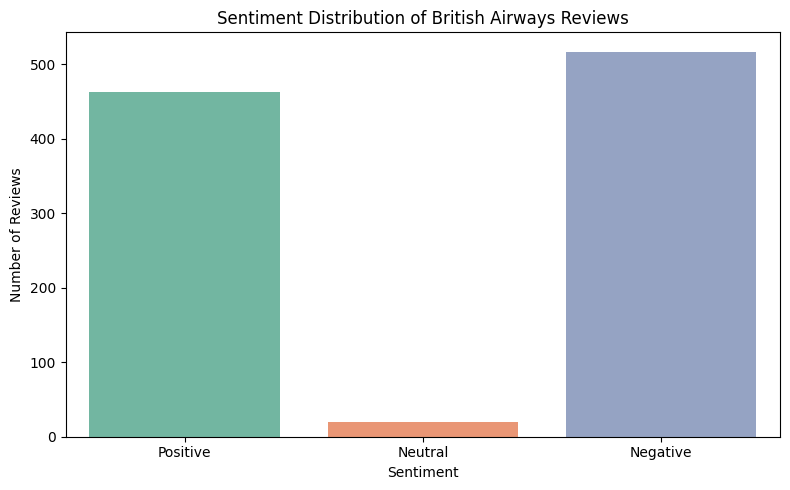

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Ensure the necessary resource is downloaded
nltk.download('vader_lexicon')

# Load your cleaned review data
df = pd.read_csv('data/cleaned_ba_reviews.csv')

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Apply sentiment analysis
df['sentiment_scores'] = df['processed_text'].apply(sid.polarity_scores)
df['compound_score'] = df['sentiment_scores'].apply(lambda x: x['compound'])

# Classify sentiment
def classify_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df['compound_score'].apply(classify_sentiment)

# Save the results
df.to_csv('data/ba_reviews_with_sentiment.csv', index=False)

# Visualize the sentiment distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='sentiment', palette='Set2', order=['Positive', 'Neutral', 'Negative'])
plt.title('Sentiment Distribution of British Airways Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.tight_layout()
plt.show()


# **Topic Modeling with LDA**

In [15]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [16]:
import pandas as pd
import gensim
from gensim import corpora
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('stopwords')

# Load the data
df = pd.read_csv('data/ba_reviews_with_sentiment.csv')

# Tokenize and clean the processed text
stop_words = set(stopwords.words('english'))
df['tokens'] = df['processed_text'].apply(lambda x: [word for word in word_tokenize(x.lower()) if word.isalpha() and word not in stop_words])

# Create dictionary and corpus
dictionary = corpora.Dictionary(df['tokens'])
corpus = [dictionary.doc2bow(text) for text in df['tokens']]

# Train LDA model
lda_model = gensim.models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=10)

# Display topics
topics = lda_model.print_topics(num_words=10)
for idx, topic in topics:
    print(f"Topic {idx+1}: {topic}")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Topic 1: 0.019*"flight" + 0.012*"crew" + 0.011*"ba" + 0.010*"time" + 0.010*"cabin" + 0.008*"seat" + 0.008*"seats" + 0.007*"good" + 0.006*"service" + 0.006*"food"
Topic 2: 0.017*"flight" + 0.009*"ba" + 0.008*"good" + 0.008*"service" + 0.007*"time" + 0.006*"seat" + 0.006*"food" + 0.005*"class" + 0.005*"crew" + 0.005*"business"
Topic 3: 0.021*"ba" + 0.016*"flight" + 0.011*"class" + 0.011*"service" + 0.009*"business" + 0.009*"good" + 0.009*"food" + 0.008*"seat" + 0.008*"crew" + 0.007*"seats"
Topic 4: 0.014*"flight" + 0.013*"ba" + 0.010*"service" + 0.009*"luggage" + 0.007*"food" + 0.007*"good" + 0.007*"airways" + 0.007*"british" + 0.006*"london" + 0.006*"experience"
Topic 5: 0.033*"flight" + 0.015*"ba" + 0.010*"us" + 0.008*"service" + 0.008*"british" + 0.008*"hours" + 0.008*"airways" + 0.007*"customer" + 0.007*"london" + 0.007*"told"


In [19]:
pip install pyLDAvis


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 21.7 MB/s eta 0:00:00


In [20]:
import pyLDAvis.gensim_models
import pyLDAvis

# Prepare the visualization
pyLDAvis.enable_notebook()  # For Jupyter Notebooks; use pyLDAvis.show() for standard Python scripts
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)

# Display the topics visualization
pyLDAvis.display(vis)


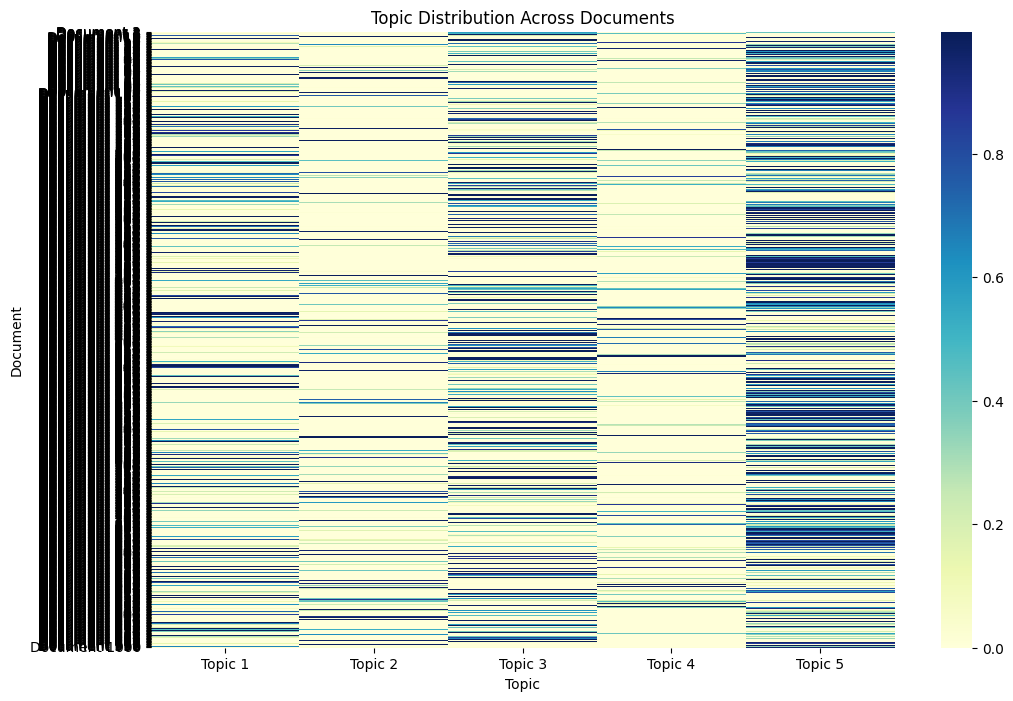

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get topic distribution for each document
topic_distribution = lda_model.get_document_topics(corpus)

# Convert to a numpy array for easy manipulation
import numpy as np
topic_matrix = np.zeros((len(topic_distribution), lda_model.num_topics))

for i, doc in enumerate(topic_distribution):
    for topic, prob in doc:
        topic_matrix[i, topic] = prob

# Create a heatmap of the topic distribution
plt.figure(figsize=(12, 8))
sns.heatmap(topic_matrix, cmap="YlGnBu", annot=False, xticklabels=[f'Topic {i+1}' for i in range(lda_model.num_topics)], yticklabels=[f'Document {i+1}' for i in range(len(topic_distribution))])
plt.title('Topic Distribution Across Documents')
plt.xlabel('Topic')
plt.ylabel('Document')
plt.show()


In [22]:
# Refine the model by adjusting parameters (e.g., number of topics, passes)
lda_model_refined = gensim.models.LdaModel(corpus, num_topics=7, id2word=dictionary, passes=15)

# Display refined topics
refined_topics = lda_model_refined.print_topics(num_words=10)
for idx, topic in refined_topics:
    print(f"Refined Topic {idx+1}: {topic}")


Refined Topic 1: 0.019*"flight" + 0.017*"ba" + 0.013*"good" + 0.012*"crew" + 0.012*"food" + 0.010*"service" + 0.010*"cabin" + 0.010*"class" + 0.009*"time" + 0.009*"business"
Refined Topic 2: 0.010*"flight" + 0.009*"service" + 0.008*"one" + 0.007*"us" + 0.006*"bag" + 0.006*"airways" + 0.006*"ba" + 0.006*"british" + 0.005*"told" + 0.005*"get"
Refined Topic 3: 0.036*"flight" + 0.013*"ba" + 0.010*"us" + 0.009*"british" + 0.008*"airways" + 0.007*"seats" + 0.007*"hours" + 0.007*"time" + 0.007*"get" + 0.006*"service"
Refined Topic 4: 0.009*"luggage" + 0.006*"british" + 0.006*"airways" + 0.006*"travel" + 0.005*"mins" + 0.005*"london" + 0.004*"passengers" + 0.004*"check" + 0.004*"one" + 0.004*"plane"
Refined Topic 5: 0.007*"staff" + 0.005*"luggage" + 0.005*"british" + 0.005*"airways" + 0.004*"service" + 0.004*"airline" + 0.003*"customer" + 0.003*"many" + 0.003*"need" + 0.003*"exit"
Refined Topic 6: 0.024*"flight" + 0.023*"ba" + 0.009*"customer" + 0.009*"london" + 0.009*"service" + 0.007*"cancel

In [23]:
import pyLDAvis.gensim_models
import pyLDAvis

# Prepare the visualization
pyLDAvis.enable_notebook()  # For Jupyter Notebooks; use pyLDAvis.show() for standard Python scripts
vis = pyLDAvis.gensim_models.prepare(lda_model_refined, corpus, dictionary)

# Display the topics visualization
pyLDAvis.display(vis)


In [24]:
from gensim.models import CoherenceModel

# Compute coherence score for the model
coherence_model = CoherenceModel(model=lda_model, texts=df['tokens'], dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()
print(f"Coherence Score: {coherence_score}")


Coherence Score: 0.38866048974428224


In [25]:
df['dominant_topic'] = [max(doc, key=lambda x: x[1])[0] for doc in topic_distribution]
print(df[['processed_text', 'dominant_topic']].head())


                                      processed_text  dominant_topic
0  we are extremely grateful to the crew of fligh...               3
1  i had an appalling experience with british air...               2
2  good points the cabin crew they were helpful p...               2
3  it was a decent flight reasonable comfortable ...               2
4  i really like flying british airways particula...               2


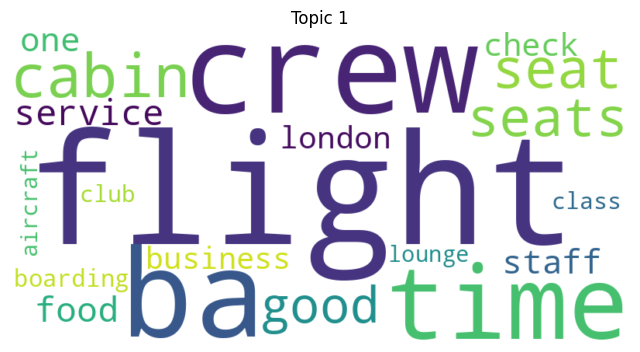

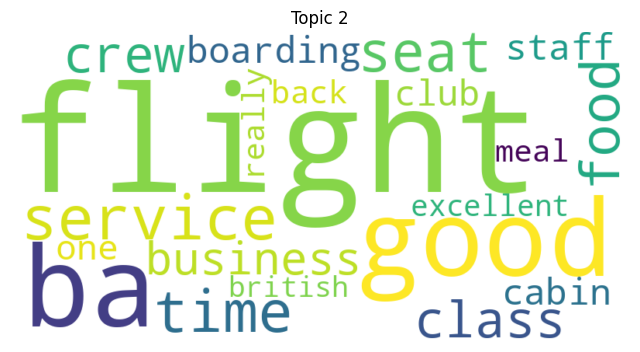

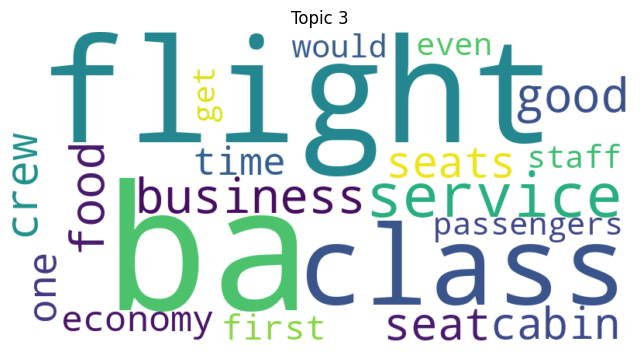

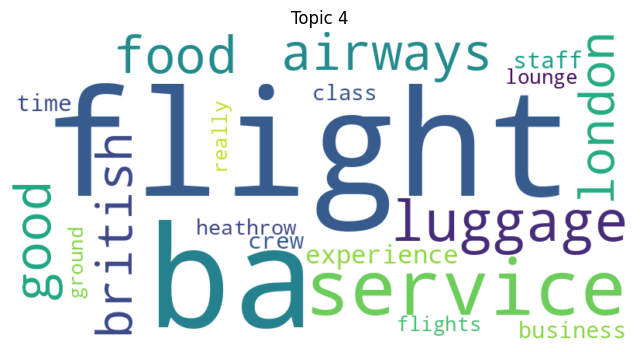

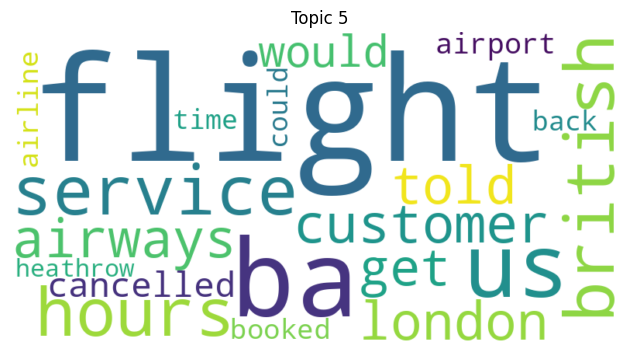

In [26]:
from wordcloud import WordCloud

# Generate word clouds for each topic
for t in range(lda_model.num_topics):
    plt.figure(figsize=(8, 6))
    words = dict(lda_model.show_topic(t, topn=20))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(words)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Topic {t+1}')
    plt.axis('off')
    plt.show()


In [27]:
# Assuming 'sentiment' column contains labels like 'positive', 'negative', 'neutral'
topic_sentiment = df.groupby('dominant_topic')['sentiment'].value_counts().unstack()
print(topic_sentiment)


sentiment       Negative  Neutral  Positive
dominant_topic                             
0                   70.0      2.0     125.0
1                   26.0      NaN      66.0
2                   97.0      2.0     141.0
3                   21.0      1.0      44.0
4                  303.0     15.0      87.0


In [28]:
topic_labels = {
    0: "In-flight Experience",
    1: "Seating & Class",
    2: "Business Class & Comfort",
    3: "Luggage & Airport Process",
    4: "Customer Service & Delays"
}
df['topic_label'] = df['dominant_topic'].map(topic_labels)


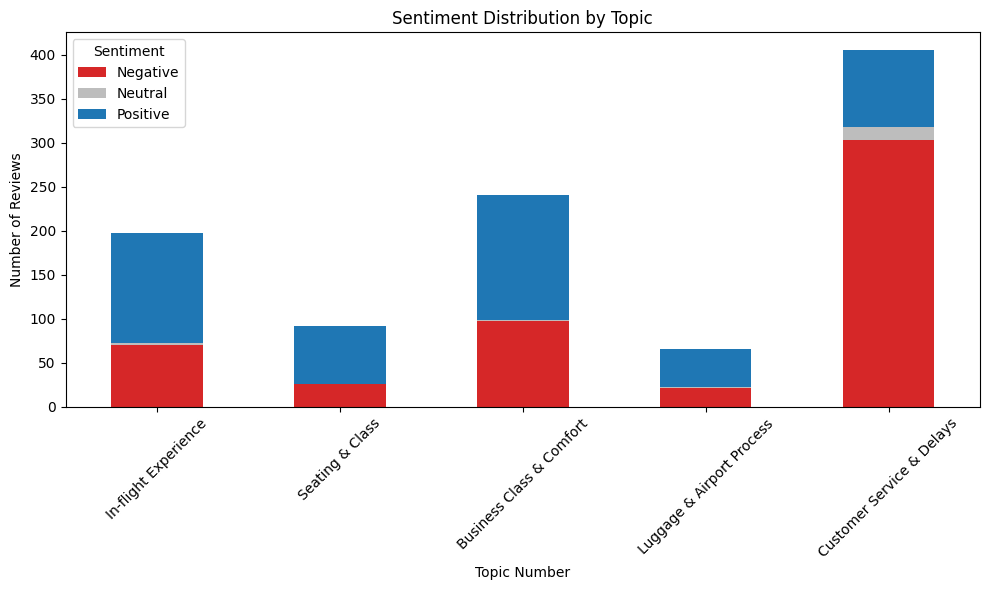

In [40]:
import matplotlib.pyplot as plt

# Replace NaNs with 0
topic_sentiment = df.groupby('dominant_topic')['sentiment'].value_counts().unstack().fillna(0)
topic_sentiment = topic_sentiment.reindex([0, 1, 2, 3, 4])  # Ensure correct order

# Ensure consistent column order
topic_sentiment = topic_sentiment[['Negative', 'Neutral', 'Positive']]

# Define custom colors
custom_colors = ['#D62728', '#BDBDBD', '#1F77B4']  # Red, Grey, Blue

# Plot
topic_sentiment.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    color=custom_colors
)

plt.title("Sentiment Distribution by Topic")
plt.xlabel("Topic Number")
plt.ylabel("Number of Reviews")
plt.legend(title="Sentiment")
plt.xticks(ticks=range(5), labels=[topic_labels[i] for i in range(5)], rotation=45)
plt.tight_layout()
plt.show()



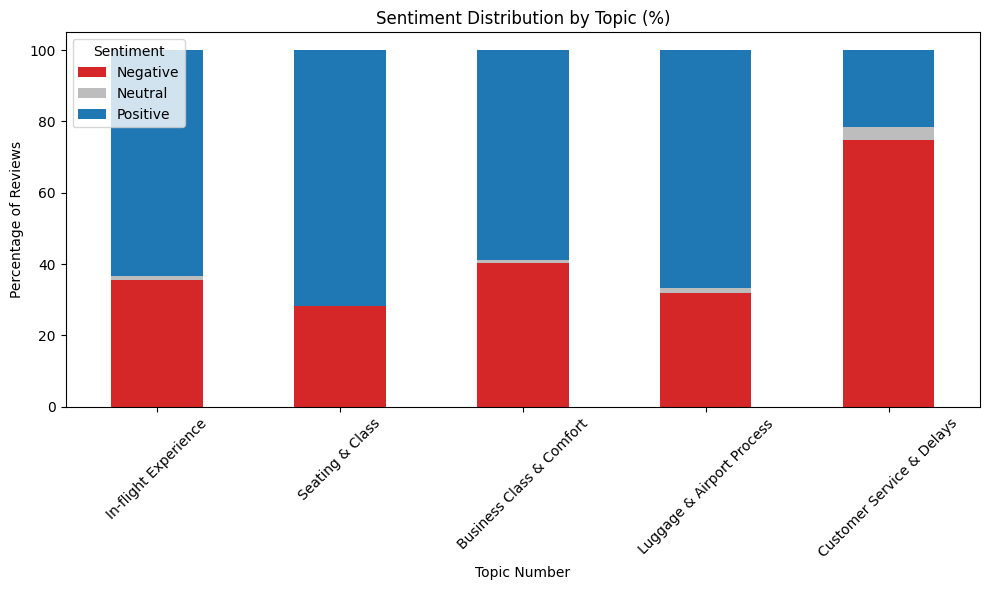

In [41]:
import matplotlib.pyplot as plt

# Group, fill missing values, and ensure correct order
topic_sentiment = df.groupby('dominant_topic')['sentiment'].value_counts().unstack().fillna(0)
topic_sentiment = topic_sentiment.reindex([0, 1, 2, 3, 4])

# Ensure consistent column order
topic_sentiment = topic_sentiment[['Negative', 'Neutral', 'Positive']]

# Normalize to percentages
topic_percentages = topic_sentiment.div(topic_sentiment.sum(axis=1), axis=0) * 100

# Define custom colors
custom_colors = ['#D62728', '#BDBDBD', '#1F77B4']  # Red, Grey, Blue

# Plot
ax = topic_percentages.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    color=custom_colors
)

plt.title("Sentiment Distribution by Topic (%)")
plt.xlabel("Topic Number")
plt.ylabel("Percentage of Reviews")
plt.legend(title="Sentiment")
plt.xticks(ticks=range(5), labels=[topic_labels[i] for i in range(5)], rotation=45)
plt.tight_layout()
plt.show()


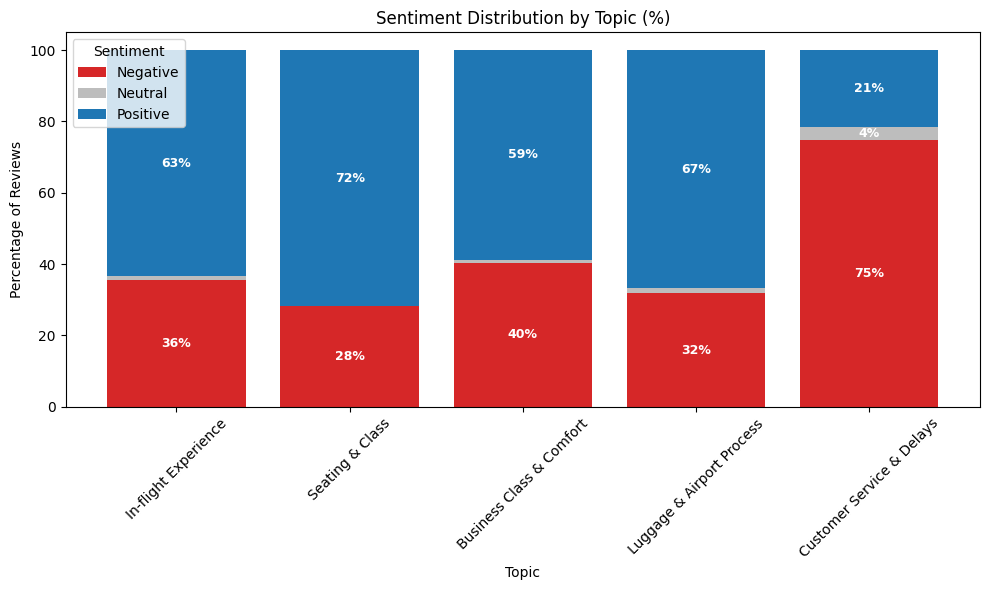

In [42]:
import matplotlib.pyplot as plt

# Group and normalize
topic_sentiment = df.groupby('dominant_topic')['sentiment'].value_counts().unstack().fillna(0)
topic_sentiment = topic_sentiment.reindex([0, 1, 2, 3, 4])
topic_sentiment = topic_sentiment[['Negative', 'Neutral', 'Positive']]
topic_percentages = topic_sentiment.div(topic_sentiment.sum(axis=1), axis=0) * 100

# Colors
custom_colors = ['#D62728', '#BDBDBD', '#1F77B4']  # Red, Grey, Blue

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
bottom_vals = [0] * len(topic_percentages)

for idx, sentiment in enumerate(topic_percentages.columns):
    values = topic_percentages[sentiment].values
    bars = ax.bar(
        topic_percentages.index,
        values,
        bottom=bottom_vals,
        color=custom_colors[idx],
        label=sentiment
    )

    # Add percentage labels
    for bar, pct in zip(bars, values):
        if pct > 3:  # Show label only if large enough to fit
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_y() + bar.get_height() / 2,
                f"{pct:.0f}%",
                ha='center',
                va='center',
                fontsize=9,
                color='white',
                weight='bold'
            )

    # Update bottom for next sentiment
    bottom_vals = [i + j for i, j in zip(bottom_vals, values)]

# Aesthetics
ax.set_title("Sentiment Distribution by Topic (%)")
ax.set_xlabel("Topic")
ax.set_ylabel("Percentage of Reviews")
ax.set_xticks(range(5))
ax.set_xticklabels([topic_labels[i] for i in range(5)], rotation=45)
ax.legend(title="Sentiment")
plt.tight_layout()
plt.show()
